In [1]:
#import dependencies
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import fashion_mnist,cifar10
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
#load data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
#normalise
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [4]:
#to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
#architecture
model_base=Sequential()
model_base.add(Flatten(input_shape=(32,32,3))) #first layer
model_base.add(Dense(1024,activation='relu'))#hidden layer
model_base.add(Dense(512,activation='relu'))
model_base.add(Dense(256,activation='relu'))
model_base.add(Dense(128,activation='relu'))
model_base.add(Dense(64,activation='relu'))
model_base.add(Dense(10,activation='softmax')) #outout layer

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#compile
model_base.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [7]:
#train
m1=model_base.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2806 - loss: 1.9621 - val_accuracy: 0.3483 - val_loss: 1.7901
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.3717 - loss: 1.7374 - val_accuracy: 0.3775 - val_loss: 1.7675
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.4056 - loss: 1.6491 - val_accuracy: 0.3984 - val_loss: 1.6568
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.4295 - loss: 1.5843 - val_accuracy: 0.4206 - val_loss: 1.6357
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.4501 - loss: 1.5358 - val_accuracy: 0.4405 - val_loss: 1.5653
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - accuracy: 0.4637 - loss: 1.4918 - val_accuracy: 0.4632 - val_loss: 1.5210
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.4715 - loss: 1.4707 - val_accuracy: 0.4627 - val_loss: 1.5095
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.4862 - loss: 1.437

In [8]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4997 - loss: 1.7055


In [9]:
#MODEL with 12 regulizer(le-4) and dropout
#architecture
model_le4=Sequential()
model_le4.add(Flatten(input_shape=(32,32,3))) #first layer
model_le4.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))#hidden layer
model_le4.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(10,activation='softmax')) #outout layer

In [10]:
#compile
model_le4.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [11]:
#train
m2=model_le4.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.2735 - loss: 2.1401 - val_accuracy: 0.3168 - val_loss: 2.0118
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.3631 - loss: 1.8610 - val_accuracy: 0.3855 - val_loss: 1.8197
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.3965 - loss: 1.7559 - val_accuracy: 0.3764 - val_loss: 1.8001
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - accuracy: 0.4213 - loss: 1.6797 - val_accuracy: 0.4152 - val_loss: 1.6874
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.4369 - loss: 1.6332 - val_accuracy: 0.4357 - val_loss: 1.6695
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.4536 - loss: 1.5888 - val_accuracy: 0.4385 - val_loss: 1.6632
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.4629 - loss: 1.5617 - val_accuracy: 0.4616 - val_loss: 1.5826
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.4758 - loss: 1

In [12]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4997 - loss: 1.7055


In [13]:
#MODEL 3
#MODEL with 12 regulizer(le-2) and dropout
#architecture
model_le2=Sequential()
model_le2.add(Flatten(input_shape=(32,32,3))) #first layer
model_le2.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))#hidden layer
model_le2.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(10,activation='softmax')) #outout layer

In [14]:
#compile
model_le2.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [15]:
#train
m3=model_le2.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step - accuracy: 0.2111 - loss: 4.4655 - val_accuracy: 0.2438 - val_loss: 2.3495
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.2464 - loss: 2.2195 - val_accuracy: 0.2610 - val_loss: 2.1606
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.2567 - loss: 2.1147 - val_accuracy: 0.2486 - val_loss: 2.1282
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step - accuracy: 0.2625 - loss: 2.0826 - val_accuracy: 0.2576 - val_loss: 2.0590
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.2647 - loss: 2.0616 - val_accuracy: 0.2643 - val_loss: 2.0936
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.2695 - loss: 2.0489 - val_accuracy: 0.2469 - val_loss: 2.0956
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.2693 - loss: 2.0380 - val_accuracy: 0.2585 - val_loss: 2.0900
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.2708 - loss: 2.

In [16]:
#evaluate
loss,test_accuracy=model_le2.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3036 - loss: 1.9277


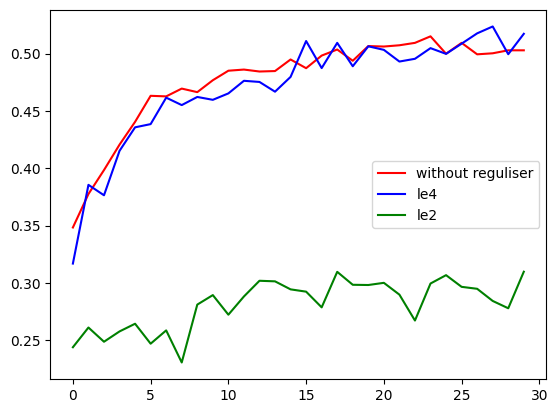

In [17]:
#visualisation
plt.plot(m1.history['val_accuracy'],label='without reguliser',color='red')
plt.plot(m2.history['val_accuracy'],label='le4',color='blue')
plt.plot(m3.history['val_accuracy'],label='le2',color='green')
plt.title='validation accuracy'
plt.xlabel='epochs'
plt.ylable='accuracy'
plt.legend()
plt.show()